In [1]:
import matplotlib.pyplot as plt
from ml_p2.neural_network import NeuralNetwork
import numpy as np
from ml_p3.utils import prepare_cell_data
from ml_p3.plotting import visualize_classifications
from ml_p2.visualization.classification_plots import plot_accuracy_heatmap

In [2]:
train_data_sets = [1,2,3,4]
test_data_sets = [5]

columns = [0,3,4,5,6,7,8,9,10]
# columns = None
train_features,_,targets_one_hot = prepare_cell_data(train_data_sets, columns)
num_classes = targets_one_hot.shape[1]

Total samples: 1024
Class 1: 670 samples
Class 2: 237 samples
Class 3: 117 samples
Selected feature columns: [0, 3, 4, 5, 6, 7, 8, 9, 10]


c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\ml_p2\neural_network\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


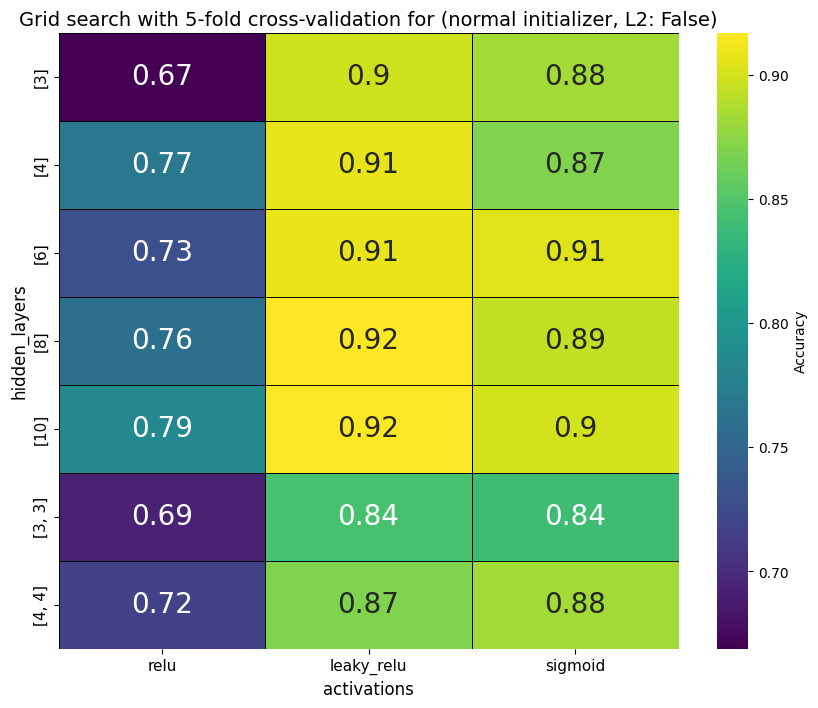

In [3]:
from ml_p3.utils import grid_search_nn

search_params = {
    "hidden_layers": [[3], [4], [6], [8], [10], [3, 3], [4, 4]],
    "activations": ["relu", "leaky_relu", "sigmoid"],
}
fixed_params = {
    'initializer': 'normal',
}


accuracies_normal, param_names_normal, param_values_normal = grid_search_nn(
    train_features, targets_one_hot, search_params=search_params, fixed_params=fixed_params
)

plot_accuracy_heatmap(
    accuracies_normal,
    param_values_normal[0],  # hidden_layers values
    param_values_normal[1],  # activations values
    param_names_normal[0],   # hidden_layers label
    param_names_normal[1],   # activations label
    "Grid search with 5-fold cross-validation for (normal initializer, L2: False)",
)

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\ml_p2\neural_network\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


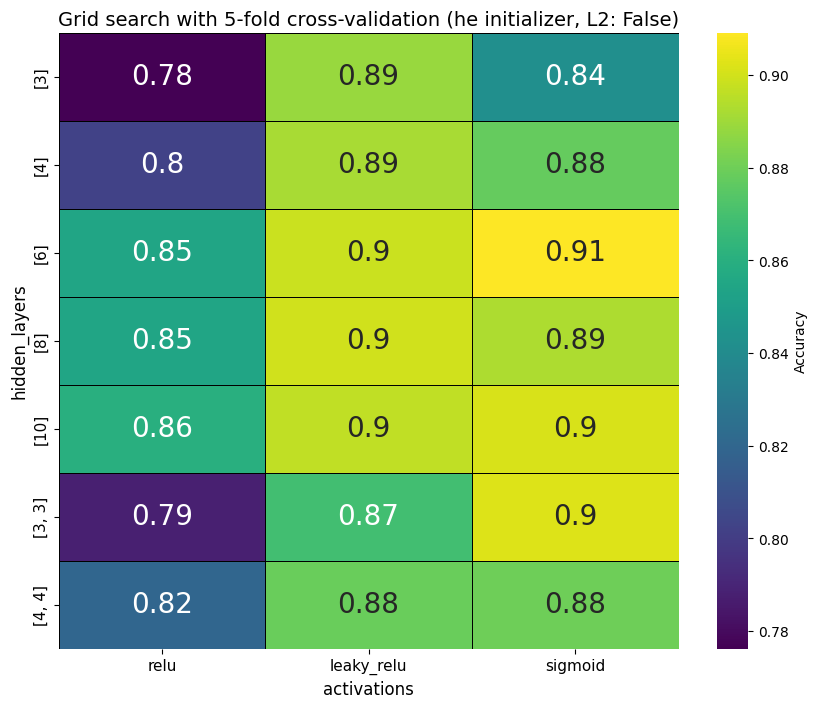

In [4]:
fixed_params = {
    'initializer': 'he',
    }

accuracies_he, param_names_he, param_values_he = grid_search_nn(
    train_features, targets_one_hot, search_params=search_params, fixed_params=fixed_params
)

plot_accuracy_heatmap(
    accuracies_he,
    param_values_he[0],  # hidden_layers values
    param_values_he[1],  # activations values
    param_names_he[0],   # hidden_layers label
    param_names_he[1],   # activations label
    "Grid search with 5-fold cross-validation (he initializer, L2: False)"
)

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\ml_p2\neural_network\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


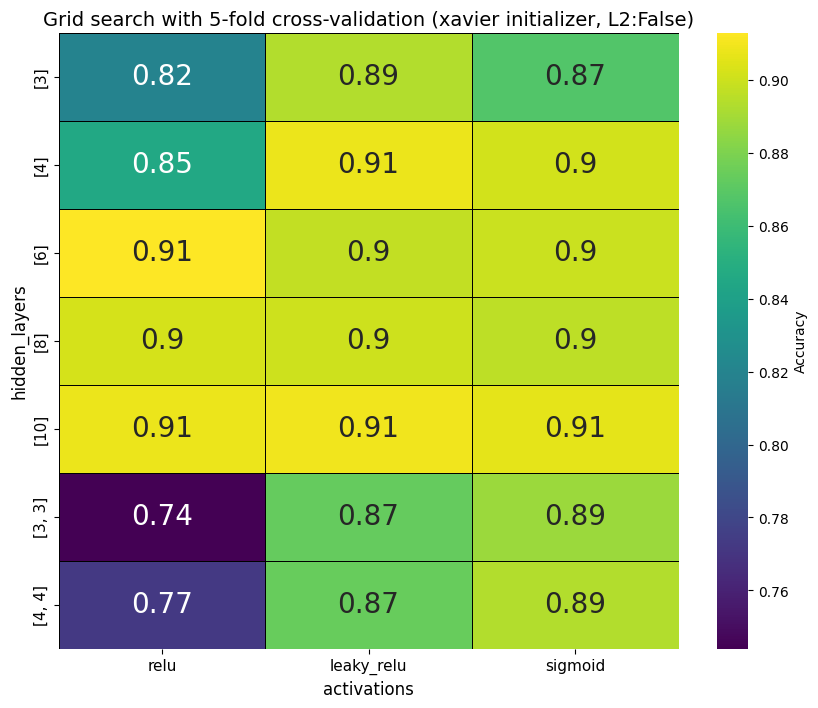

In [5]:
fixed_params = {
    'initializer': 'xavier',
    }

accuracies_xaviar, param_names_xaviar, param_values_xaviar = grid_search_nn(
    train_features, targets_one_hot, search_params=search_params, fixed_params=fixed_params
)

plot_accuracy_heatmap(
    accuracies_xaviar,
    param_values_xaviar[0],  # hidden_layers values
    param_values_xaviar[1],  # activations values
    param_names_xaviar[0],   # hidden_layers label
    param_names_xaviar[1],   # activations label
    "Grid search with 5-fold cross-validation (xavier initializer, L2:False)"
)

c:\Users\javid.rezai\AppData\Local\anaconda3\envs\p33\lib\site-packages\ml_p2\neural_network\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


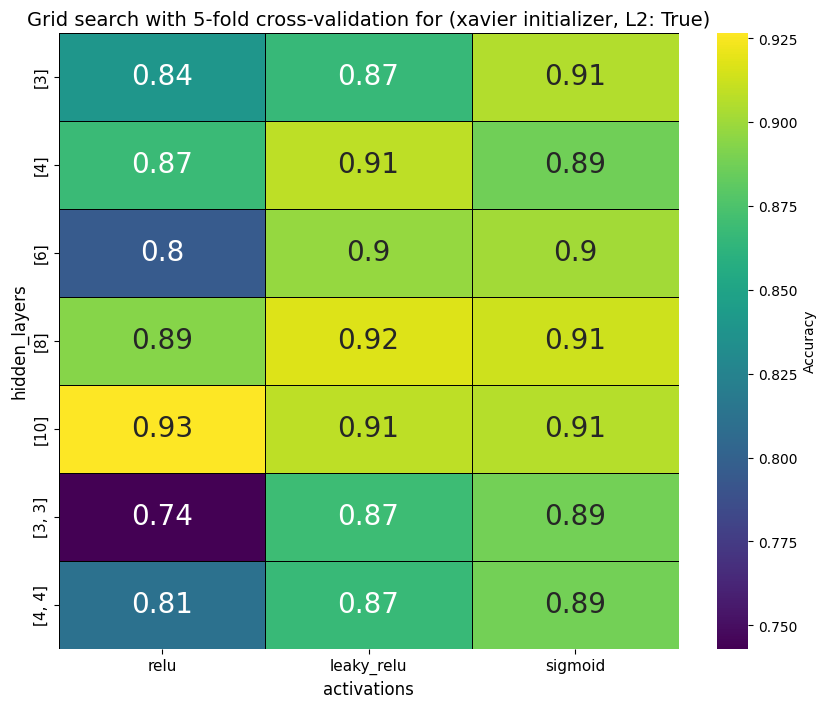

In [27]:
from ml_p3.utils import grid_search_nn

search_params = {
    "hidden_layers": [[3], [4], [6], [8], [10], [3, 3], [4, 4]],
    "activations": ["relu", "leaky_relu", "sigmoid"],
}
fixed_params = {
    'initializer': 'xavier',
    'regularization': True,
}


accuracies_normal, param_names_normal, param_values_normal = grid_search_nn(
    train_features, targets_one_hot, search_params=search_params, fixed_params=fixed_params
)

plot_accuracy_heatmap(
    accuracies_normal,
    param_values_normal[0],  # hidden_layers values
    param_values_normal[1],  # activations values
    param_names_normal[0],   # hidden_layers label
    param_names_normal[1],   # activations label
    "Grid search with 5-fold cross-validation for (xavier initializer, L2: True)",
)

In [51]:
test_file = r"C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\miniature-octo-waddle\ml-p3\tests\data\classification\combined_mean_image5_seg.npy"
test_classifications_file = r"C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\miniature-octo-waddle\ml-p3\tests\data\classification\classifications5.npy"
test_masks = np.load(test_file, allow_pickle=True).item()["masks"]
test_classifications = np.load(test_classifications_file, allow_pickle=True).item()["classifications"]


test_features, adjusted_targets, test_targets_one_hot = prepare_cell_data(test_data_sets, columns)

NN1 = NeuralNetwork(
    input_size=train_features.shape[1],
    hidden_layers=[8],
    output_size=3,
    hidden_activation="leaky_relu",
    output_activation="softmax",
    classification_type="multiclass",
    initializer="normal",
)
NN1.train_classifier(train_features, targets_one_hot, epochs=500)
print("Train score: ",NN1.accuracy_score(train_features, targets_one_hot))

predictions = NN1.predict_classes(test_features)
predicted_classes = predictions +1
print("Test score",NN1.accuracy_score(test_features, test_targets_one_hot))
print("test_targets", adjusted_targets[0:20]+1)
print("pred_classes", predicted_classes[0:20])

Total samples: 388
Class 1: 298 samples
Class 2: 66 samples
Class 3: 24 samples
Selected feature columns: [0, 3, 4, 5, 6, 7, 8, 9, 10]
Train score:  0.9482421875
Test score 0.9742268041237113
test_targets [2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
pred_classes [2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


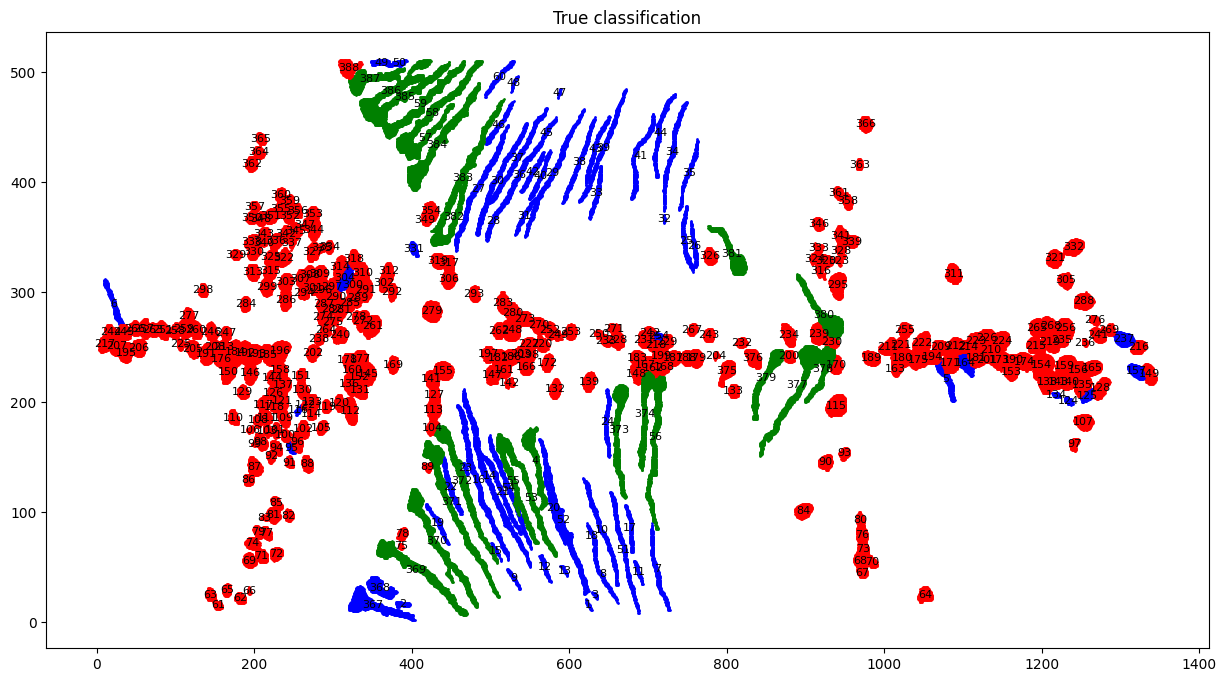

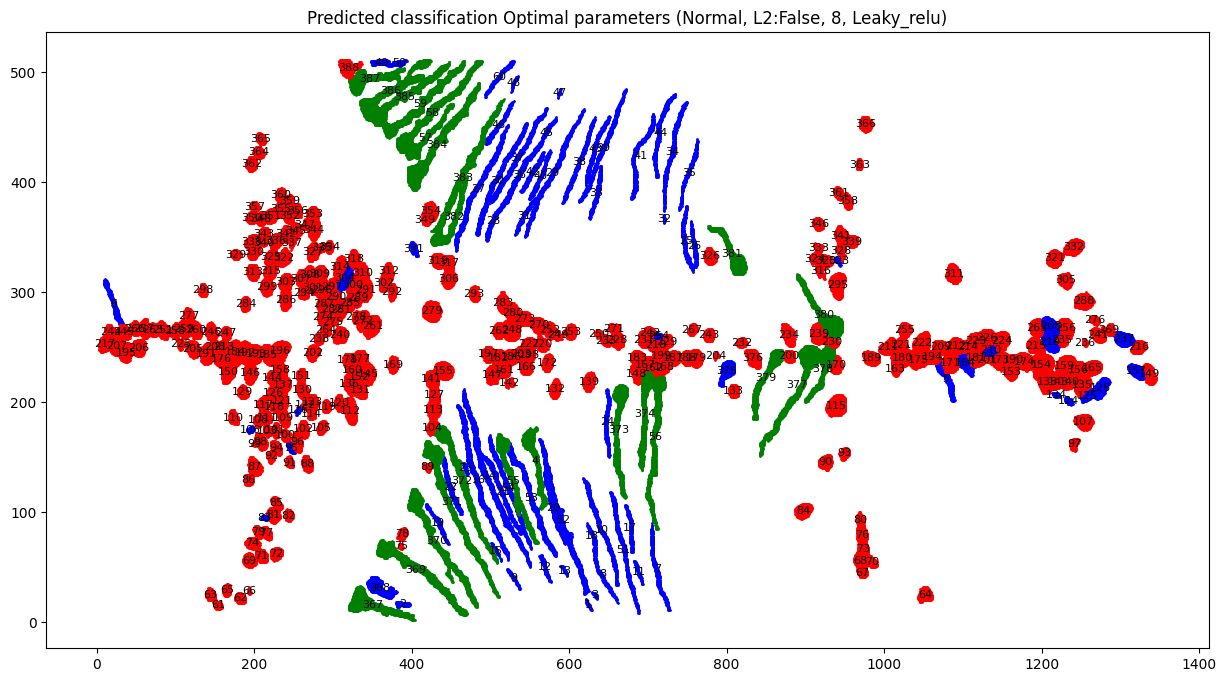

In [52]:
new_classifier = []

for i in range(len(test_targets_one_hot)):
    classification = predicted_classes[i]
    cell_label =  test_classifications[i][1]
    new_classifier.append((classification, cell_label))
from astroglial_analysis.classifier2 import visualize_classifications

plt.figure(figsize=(15,8))
visualize_classifications(test_masks, test_classifications,"True classification")

plt.figure(figsize=(15,8))

visualize_classifications(test_masks, new_classifier,"Predicted classification Optimal parameters (Normal, L2:False, 8, Leaky_relu)")

In [15]:
NN2 = NeuralNetwork(
    input_size=train_features.shape[1],
    hidden_layers=[6],
    output_size=3,
    hidden_activation="sigmoid",
    output_activation="softmax",
    classification_type="multiclass",
    initializer="he",
)

NN2.train_classifier(train_features, targets_one_hot, epochs=500)
print("Train score: ",NN2.accuracy_score(train_features, targets_one_hot))

predictions = NN2.predict_classes(test_features)
predicted_classes = predictions +1
print("Test score",NN2.accuracy_score(test_features, test_targets_one_hot))
print("test_targets", adjusted_targets[0:20]+1)
print("pred_classes", predicted_classes[0:20])

Train score:  0.919921875
Test score 0.9664948453608248
test_targets [2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
pred_classes [2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


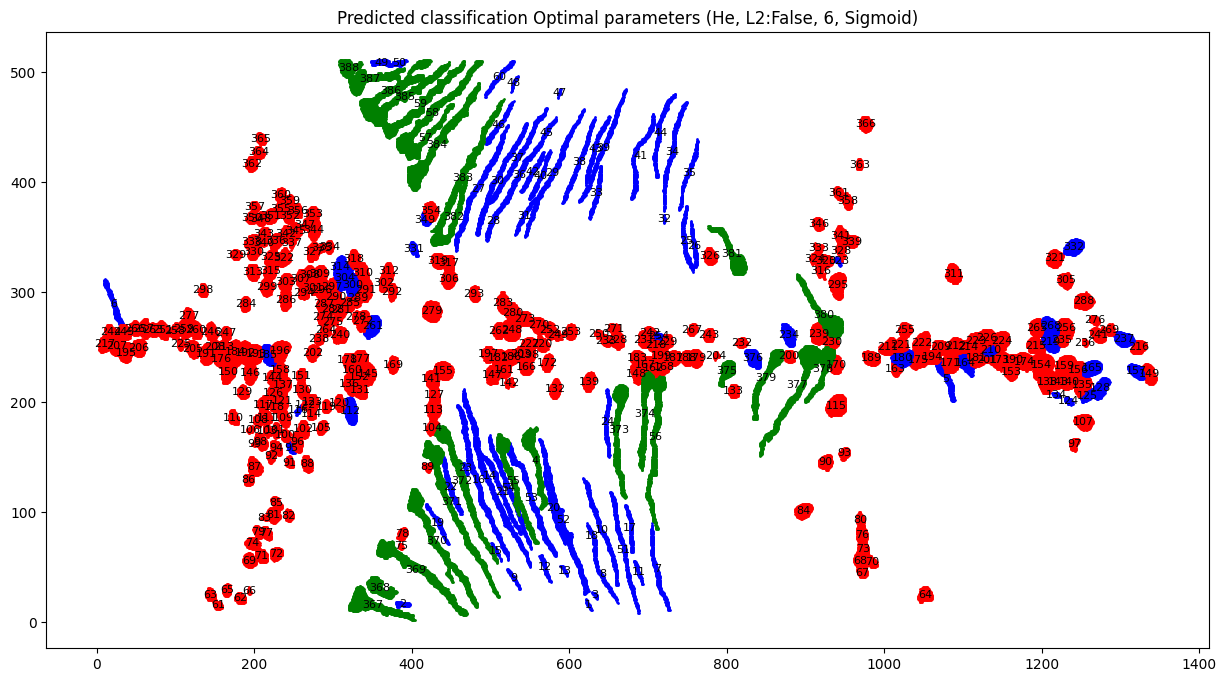

In [24]:
new_classifier = []

for i in range(len(test_targets_one_hot)):
    classification = predicted_classes[i]
    cell_label =  test_classifications[i][1]
    new_classifier.append((classification, cell_label))
from astroglial_analysis.classifier2 import visualize_classifications



plt.figure(figsize=(15,8))

visualize_classifications(test_masks, new_classifier,"Predicted classification Optimal parameters (He, L2:False, 6, Sigmoid)")

In [19]:
NN3 = NeuralNetwork(
    input_size=train_features.shape[1],
    hidden_layers=[4],
    output_size=3,
    hidden_activation="leaky_relu",
    output_activation="softmax",
    classification_type="multiclass",
    initializer="xavier",
)

NN3.train_classifier(train_features, targets_one_hot, epochs=500)
print("Train Score:", NN3.accuracy_score(train_features, targets_one_hot))

predictions = NN3.predict_classes(test_features)
predicted_classes = predictions +1
print("Test score",NN3.accuracy_score(test_features, test_targets_one_hot))
print("test_targets", adjusted_targets[0:20]+1)
print("pred_classes", predicted_classes[0:20])

Train Score: 0.9365234375
Test score 0.9458762886597938
test_targets [2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
pred_classes [2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


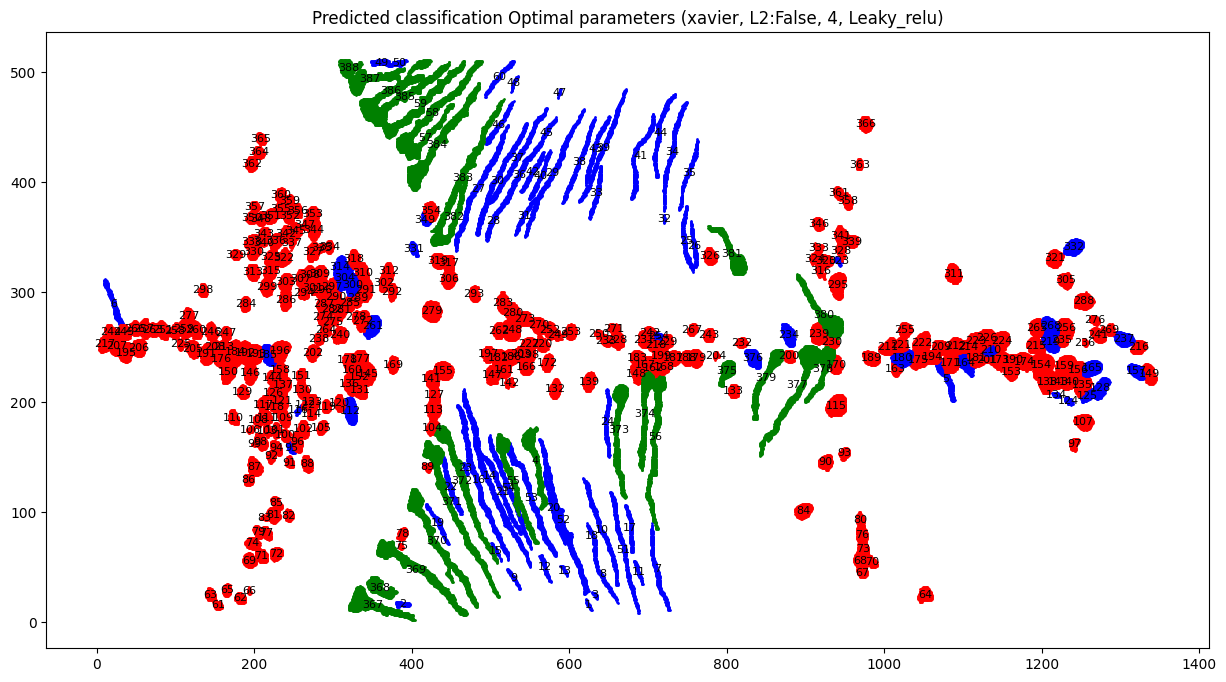

In [25]:
new_classifier = []

for i in range(len(test_targets_one_hot)):
    classification = predicted_classes[i]
    cell_label =  test_classifications[i][1]
    new_classifier.append((classification, cell_label))
from astroglial_analysis.classifier2 import visualize_classifications


plt.figure(figsize=(15,8))

visualize_classifications(test_masks, new_classifier,"Predicted classification Optimal parameters (xavier, L2:False, 4, Leaky_relu)")

# Suboptimal parameters


In [62]:
test_file = r"C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\miniature-octo-waddle\ml-p3\tests\data\classification\combined_mean_image5_seg.npy"
test_classifications_file = r"C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\miniature-octo-waddle\ml-p3\tests\data\classification\classifications5.npy"
test_masks = np.load(test_file, allow_pickle=True).item()["masks"]
test_classifications = np.load(test_classifications_file, allow_pickle=True).item()["classifications"]


test_features, adjusted_targets, test_targets_one_hot = prepare_cell_data(test_data_sets, columns)

NN1 = NeuralNetwork(
    input_size=train_features.shape[1],
    hidden_layers=[3],
    output_size=3,
    hidden_activation="leaky_relu",
    output_activation="softmax",
    classification_type="multiclass",
    initializer="xavier",
)
NN1.train_classifier(train_features, targets_one_hot, epochs=500)
print("Train score: ",NN1.accuracy_score(train_features, targets_one_hot))

predictions = NN1.predict_classes(test_features)
predicted_classes = predictions +1
print("Test score",NN1.accuracy_score(test_features, test_targets_one_hot))
print("test_targets", adjusted_targets[0:20]+1)
print("pred_classes", predicted_classes[0:20])

Total samples: 388
Class 1: 298 samples
Class 2: 66 samples
Class 3: 24 samples
Selected feature columns: [0, 3, 4, 5, 6, 7, 8, 9, 10]
Train score:  0.955078125
Test score 0.9639175257731959
test_targets [2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
pred_classes [2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


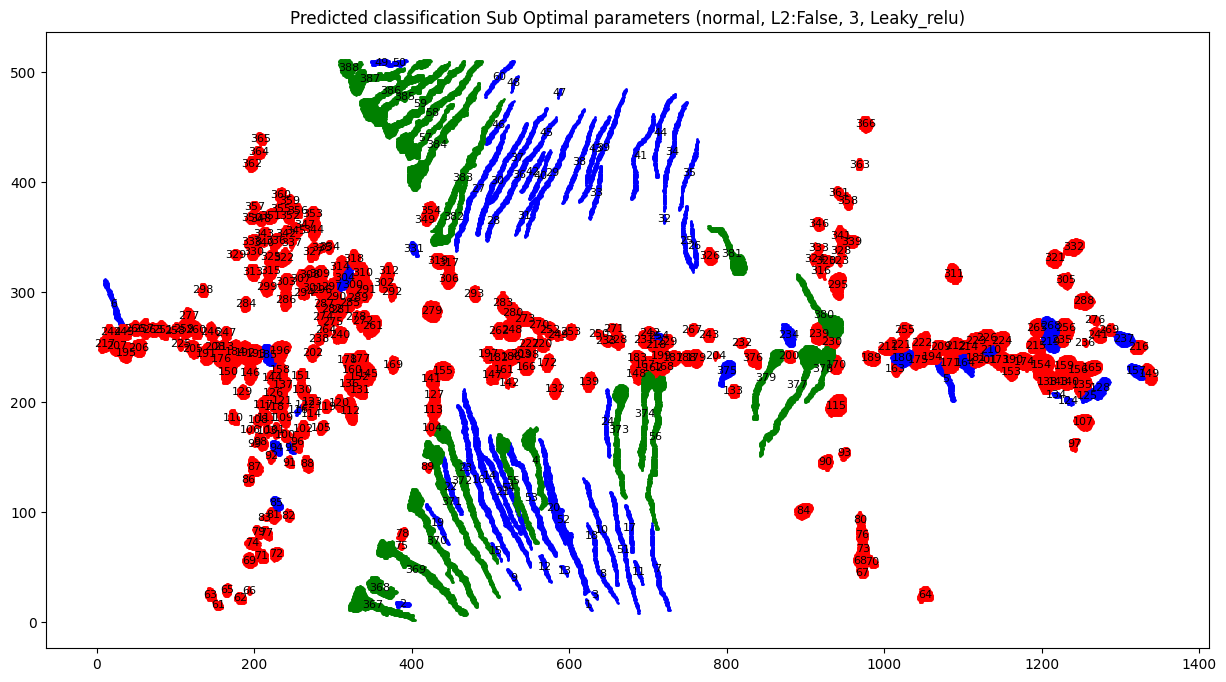

In [63]:
new_classifier = []

for i in range(len(test_targets_one_hot)):
    classification = predicted_classes[i]
    cell_label =  test_classifications[i][1]
    new_classifier.append((classification, cell_label))
from astroglial_analysis.classifier2 import visualize_classifications


plt.figure(figsize=(15,8))

visualize_classifications(test_masks, new_classifier,"Predicted classification Sub Optimal parameters (normal, L2:False, 3, Leaky_relu)")

# Regularization


In [ ]:
test_file = r"C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\miniature-octo-waddle\ml-p3\tests\data\classification\combined_mean_image5_seg.npy"
test_classifications_file = r"C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\miniature-octo-waddle\ml-p3\tests\data\classification\classifications5.npy"
test_masks = np.load(test_file, allow_pickle=True).item()["masks"]
test_classifications = np.load(test_classifications_file, allow_pickle=True).item()["classifications"]


test_features, adjusted_targets, test_targets_one_hot = prepare_cell_data(test_data_sets, columns)

NN1 = NeuralNetwork(
    input_size=train_features.shape[1],
    hidden_layers=[8],
    output_size=3,
    hidden_activation="relu",
    output_activation="softmax",
    classification_type="multiclass",
    initializer="he",
    use_regularization=True,
)
NN1.train_classifier(train_features, targets_one_hot, epochs=500)
print("Train score: ",NN1.accuracy_score(train_features, targets_one_hot))

predictions = NN1.predict_classes(test_features)
predicted_classes = predictions +1
print("Test score",NN1.accuracy_score(test_features, test_targets_one_hot))
print("test_targets", adjusted_targets[0:20]+1)
print("pred_classes", predicted_classes[0:20])


Total samples: 388
Class 1: 298 samples
Class 2: 66 samples
Class 3: 24 samples
Selected feature columns: [0, 3, 4, 5, 6, 7, 8, 9, 10]
Train score:  0.9189453125
Test score 0.961340206185567
test_targets [2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
pred_classes [2 2 2 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


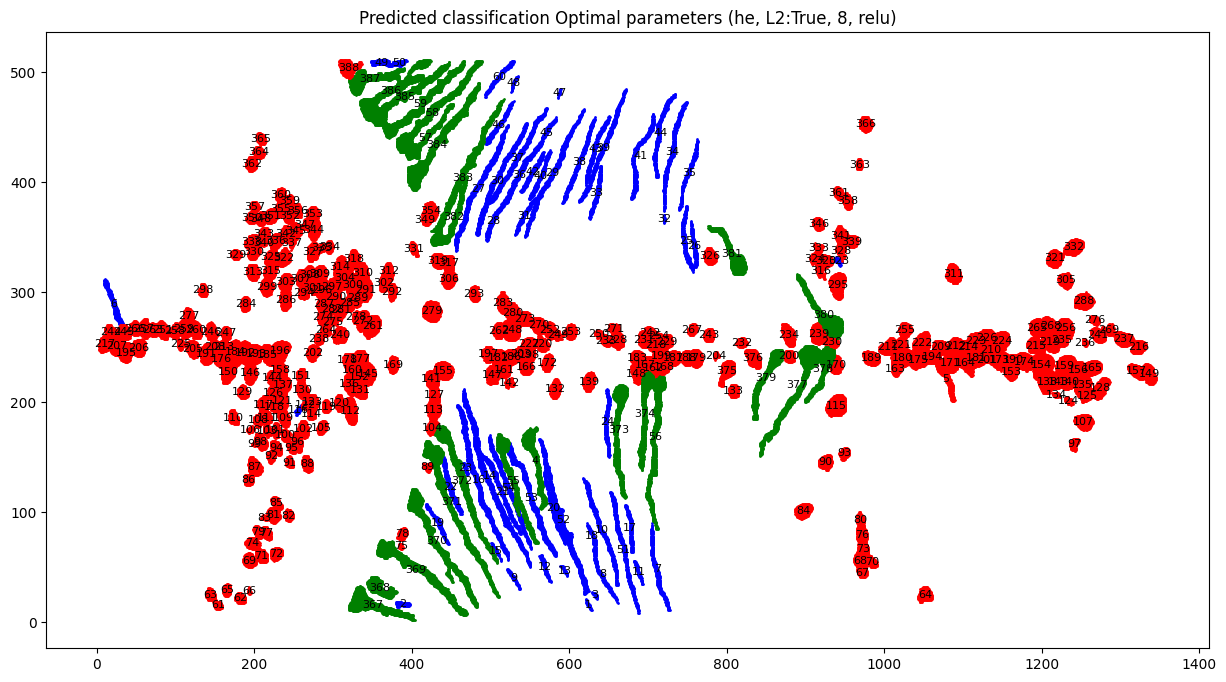

In [73]:
new_classifier = []

for i in range(len(test_targets_one_hot)):
    classification = predicted_classes[i]
    cell_label =  test_classifications[i][1]
    new_classifier.append((classification, cell_label))
from astroglial_analysis.classifier2 import visualize_classifications


plt.figure(figsize=(15,8))

visualize_classifications(test_masks, new_classifier,"Predicted classification Optimal parameters (he, L2:True, 8, relu)")

In [77]:
import pickle

def save_neural_network(model, filepath):
    """Save neural network model to file"""
    model_state = {
        'params': model.params,
        'weights': model.weights,
        'biases': model.biases
    }
    with open(filepath, 'wb') as f:
        pickle.dump(model_state, f)

def load_neural_network(filepath):
    """Load neural network model from file"""
    with open(filepath, 'rb') as f:
        model_state = pickle.load(f)
    
    # Recreate the model using the stored parameters
    model = NeuralNetwork(**model_state['params'])
    model.weights = model_state['weights']
    model.biases = model_state['biases']
    return model

In [79]:
save_neural_network(NN1,r"C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\miniature-octo-waddle\ml-p3\ml_p3\models\he_relu_8_reg.pkl")

In [80]:
loaded_model = load_neural_network(r"C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\miniature-octo-waddle\ml-p3\ml_p3\models\he_relu_8_reg.pkl")
predictions = loaded_model.predict_classes(test_features)
print("Test score with loaded model:", loaded_model.accuracy_score(test_features, test_targets_one_hot))

Test score with loaded model: 0.961340206185567
